In [0]:
!pip install vecstack
!pip -q install shap
!pip -q install lime
!pip -q install eli5
!pip install tpot
!pip install hyperopt
!pip install plotly.express

  Created wheel for vecstack: filename=vecstack-0.4.0-cp36-none-any.whl size=19879 sha256=abc6aee15af73ada75dacb2eee6cdec5a79788820c183dcedb4e230d10166e05
  Stored in directory: /root/.cache/pip/wheels/5f/bb/4e/f6488433d53bc0684673d6845e5bf11a25240577c8151c140e
Successfully built vecstack
     |████████████████████████████████| 235kB 5.0MB/s 
     |████████████████████████████████| 276kB 5.5MB/s 
     |████████████████████████████████| 112kB 5.0MB/s 
     |████████████████████████████████| 81kB 5.3MB/s 
     |████████████████████████████████| 153kB 15.6MB/s 
  Created wheel for stopit: filename=stopit-1.1.2-cp36-none-any.whl size=11956 sha256=ad5ea3cb8ab2386f37cf553022c2d7d450a5b2faa47a13540c8b226cc3c12d6b
  Stored in directory: /root/.cache/pip/wheels/3c/85/2b/2580190404636bfc63e8de3dff629c03bb795021e1983a6cc7
Successfully built stopit
     |████████████████████████████████| 7.1MB 4.8MB/s 
  Found existing installation: plotly 3.6.1
    Uninstalling plotly-3.6.1:
      Successfully un

In [0]:
#library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import random as rnd

from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix

# Importing Models
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Importing other tools
from sklearn import model_selection
from sklearn.metrics import confusion_matrix, classification_report, make_scorer
from sklearn.metrics import accuracy_score, recall_score, precision_recall_curve
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.calibration import CalibratedClassifierCV
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from tpot import TPOTClassifier
from sklearn.model_selection import KFold, ShuffleSplit, StratifiedKFold
import warnings
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px
import itertools

In [0]:
#@title Data Preprocessing
data = pd.read_csv("https://raw.githubusercontent.com/Mineria/Titanic/master/csv/train.csv")

# Drop Ticket & Cabin 
data = data.drop(['Ticket', 'Cabin'], axis=1)

# Get the title from name
data['Title'] = data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
data['Title'] = data['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
data['Title'] = data['Title'].replace('Mlle', 'Miss')
data['Title'] = data['Title'].replace('Ms', 'Miss')
data['Title'] = data['Title'].replace('Mme', 'Mrs')

title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5} 
data['Title'] = data['Title'].map(title_mapping)
data = data.drop(['Name', 'PassengerId'], axis=1)

#Change Sex to Numeric
data['Sex'] = data['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

#Add Family Size 
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1
data['IsAlone'] = 0
data.loc[data['FamilySize'] == 1, 'IsAlone'] = 1
data = data.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)

#Imputing Missing Value 
data['Age'].fillna(data['Age'].dropna().median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].dropna().mode()[0], inplace=True)

# Categorizing Numerical Value 
# data['FareBand'] = pd.qcut(data['Fare'], 4).astype(str)
# data['AgeBand'] = pd.qcut(data['Age'], 4).astype(str)
# data = data.drop(['Fare', 'Age'], axis=1)

# Converting Embark to Number
data['Embarked'] = data['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

# 

# data['FareBand'] = data['FareBand'].map( {'(-0.001, 7.91]': 0, '(31.0, 512.329]': 3, '(7.91, 14.454]': 1, '(14.454, 31.0]':2 } ).astype(int)
# data['AgeBand'] = data['AgeBand'].map( {'(0.419, 22.0]': 0, '(35.0, 80.0]': 3, '(22.0, 28.0]': 1, '(28.0, 35.0]':2 } ).astype(int)

# Change in the cateogry Type & Data Columns to make it dummy
dataDump  = data.copy()
df = dataDump.drop(['Survived','Age','Fare'], axis=1)
# df2 = df.drop([],axis = 1)
df3 = pd.DataFrame()
for col in df.columns:
    df3[col] = df[col].astype('category')

Target = ['Survived']
data1_x_bin = pd.concat([pd.get_dummies(df3), data[['Age','Fare']]],axis=1)

X = data1_x_bin
y = data[Target]

In [0]:
# Class to do Auto Feature Engineering 

In [0]:
# Class to Feature Selection 

In [0]:
# Class to Feature Compression 

In [0]:
class BaseModellingHelper:

    def __init__(self, std_param, base_model):
        # if not set(grid_models.keys()).issubset(set(grid_params.keys()))  \
        #       or not set(popt_models.keys()).issubset(set(popt_params.keys())) \
        #       or not set(automl_model.keys()).issubset(set(automl_params.keys())) \
        #       or not set(dl_model.keys()).issubset(set(dl_params.keys())):

        #     missing_params_grid = list(set(grid_models.keys()) - set(grid_params.keys()))
        #     missing_params_popt = list(set(popt_models.keys()) - set(popt_params.keys()))
        #     missing_params_automl = list(set(automl_model.keys()) - set(automl_params.keys()))
        #     missing_params_dl = list(set(dl_model.keys()) - set(dl_params.keys()))

        #     raise ValueError("Some estimators are missing parameters: %s" % missing_params_grid, missing_params_popt,missing_params_automl,missing_params_dl)
        
        self.std_param = std_param
        if self.std_param['Split_type'] == 'ShuffleSplit':
          self.cross_val = model_selection.ShuffleSplit(n_splits = self.std_param['folds'], test_size = self.std_param['test_size'], train_size = self.std_param['train_size'], random_state = self.std_param['seed'] )
        
        self.base_model = base_model
        self.base_model_output = {}
        self.feature_importance_df_sorted = pd.DataFrame()
        self.important_col =[]
        
        self.scoring = { 'accuracy' : make_scorer(metrics.accuracy_score), 
                  'precision' : make_scorer(metrics.precision_score),
                  'recall' : make_scorer(metrics.recall_score), 
                  'f1_score' : make_scorer(metrics.f1_score),
                  'average_precision': make_scorer(metrics.average_precision_score),
                  'balanced_accuracy': make_scorer(metrics.balanced_accuracy_score),
                  'hamming_loss':make_scorer(metrics.hamming_loss),
                  'jaccard_score': make_scorer(metrics.jaccard_score),
                  'log_loss': make_scorer(metrics.log_loss),
                  'roc_auc_score':make_scorer(metrics.roc_auc_score),
                  'zero_one_loss':make_scorer(metrics.zero_one_loss,normalize=False)
                  }
                    

        self.scores_list = []
        # self.grid_searches = {}
        # self.best_params = {}
        self.feature_importance = {}
        self.FeatureImportanceAlgo = ['DecisionTreeClassifier','RandomForestClassifier','ExtraTreesClassifier','GradientBoostingClassifier','AdaBoostClassifier']
        # self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size=self.std_param['test_size'])
    
    def getScoreDictionary(self, base_model_output,modelname, basemodel_scores, score_type):
      self.base_model_output[modelname]['Time'] = basemodel_scores['fit_time'].mean()
      self.base_model_output[modelname]['%s_accuracy' %score_type ] =  basemodel_scores['%s_accuracy' %score_type].mean()
      self.base_model_output[modelname]['%s_precision' %score_type ] =  basemodel_scores['%s_precision' %score_type].mean()
      self.base_model_output[modelname]['%s_recall' %score_type ] =  basemodel_scores['%s_recall' %score_type].mean()
      self.base_model_output[modelname]['%s_f1_score' %score_type ] =  basemodel_scores['%s_f1_score' %score_type].mean()
      self.base_model_output[modelname]['%s_average_precision' %score_type ] =  basemodel_scores['%s_average_precision' %score_type].mean()
      self.base_model_output[modelname]['%s_balanced_accuracy' %score_type ] =  basemodel_scores['%s_balanced_accuracy' %score_type].mean()
      self.base_model_output[modelname]['%s_hamming_loss' %score_type ] =  basemodel_scores['%s_hamming_loss' %score_type].mean()
      self.base_model_output[modelname]['%s_jaccard_score' %score_type ] =  basemodel_scores['%s_jaccard_score' %score_type].mean()
      self.base_model_output[modelname]['%s_log_loss' %score_type ] =  basemodel_scores['%s_log_loss' %score_type].mean()
      self.base_model_output[modelname]['%s_roc_auc_score' %score_type ] =  basemodel_scores['%s_roc_auc_score' %score_type].mean()
      self.base_model_output[modelname]['%s_zero_one_loss' %score_type ] =  basemodel_scores['%s_zero_one_loss' %score_type].mean()

      return None

    def ModelLoop(self,X, y, score_type=None):
      for key, eachModel in self.base_model.items():
          basemodel_scores = model_selection.cross_validate(eachModel, X,y, cv  = self.cross_val,return_train_score=True,scoring=self.scoring, pre_dispatch="2*n_jobs")
          modelname = eachModel.__class__.__name__
          self.base_model_output[modelname] = {}
          self.getScoreDictionary(self.base_model_output,modelname, basemodel_scores, 'train')
          self.getScoreDictionary(self.base_model_output,modelname, basemodel_scores, 'test')
          self.scores_list.append(basemodel_scores)
          if eachModel.__class__.__name__ in self.FeatureImportanceAlgo:
            eachModel.fit(X,y)
            self.feature_importance[eachModel.__class__.__name__]= eachModel.feature_importances_

    def runBaseLineModel(self, X, y, score_type=None, auto_feature_eng = None , top_feature = None ):
      if top_feature:
        print ("Building model with only %s important feature" % top_feature)
        #Initial Model Loop to extract top feature
        self.ModelLoop(X, y, score_type)
        imp_df = self.getFeatureImportance(self.getFeatureImportanceDF(X, self.feature_importance))
        important_col = list(imp_df[:top_feature].index)
        self.important_col = important_col
        X = X[important_col]
        self.ModelLoop(X, y,score_type)
      else:
        print ("Building model without any important feature")
        self.ModelLoop(X, y,score_type)
        
    def getFeatureImportanceDF(self, X, feature_importance_dict, important_col=None):
      if important_col:
        feature_names = important_col
        feat_imp_df = pd.DataFrame.from_dict(feature_importance_dict)
        feat_imp_df.index = feature_names
        return feat_imp_df
      else:
        feature_names = X.columns
        feat_imp_df = pd.DataFrame.from_dict(feature_importance_dict)
        feat_imp_df.index = feature_names
        return feat_imp_df

    def getFeatureImportance(self,feat_imp_df):
      mms = MinMaxScaler()
      # scaling to MinMax Scale 
      scaled_fi = pd.DataFrame(data=mms.fit_transform(feat_imp_df),columns=feat_imp_df.columns,index=feat_imp_df.index)
      # Adding all values of importance to get single socre
      scaled_fi['SumofImp'] = scaled_fi.sum(axis=1)
      # print(scaled_fi.head())
      ordered_ranking = scaled_fi.sort_values('SumofImp', ascending=False)
      return ordered_ranking


    def getFeatureImportanceGraph(self,ordered_feature_importance_df):
      self.feature_importance_df_sorted.append(ordered_feature_importance_df)
      fig, ax = plt.subplots(figsize=(10,7), dpi=80)
      sns.barplot(data=ordered_feature_importance_df, y=ordered_feature_importance_df.index, x='SumofImp', palette='magma')
      ax.spines['right'].set_visible(False)
      ax.spines['top'].set_visible(False)
      ax.spines['bottom'].set_visible(False)
      ax.xaxis.set_visible(False)
      ax.grid(False)
      ax.set_title('Aggregated Feature Importances for Models');
      return ax

    def getModelDataframe(self, base_model_output, sort_column, asscending=False,difference_by=None, score_filter=None):
      score_table =  pd.DataFrame.from_dict(base_model_output).T
      if score_filter:
        score_columns = [['train_'+ eachScore,'test_'+eachScore] for eachScore in score_filter]
        score_columns_flat = list(itertools.chain(*score_columns))
        score_columns_flat.append("Time")
        score_table = score_table[score_columns_flat]
      score_table['Difference_%s_unit'%difference_by] = abs(score_table['train_%s' %difference_by] - score_table['test_%s' %difference_by])*100
      score_table_ordered = score_table.sort_values(sort_column, ascending=asscending)
      return score_table_ordered
    
    def getModelValidationGraph(self, ModelDataFrame, x_col= None, Difference_bins=5,difference_col=None,size=None):
      ModelDataFrame['MLName'] = ModelDataFrame.index
      ModelDataFrame['Difference_Bin'] = pd.cut(ModelDataFrame[difference_col],Difference_bins)
      ax = plt.figure(figsize=(18,8))
      # sns.scatterplot(x=x_col, y="MLName",data=ModelDataFrame,size='Time', hue='Difference_Bin',sizes=(20, 600), hue_norm=(0, 20))
      fig = px.scatter(ModelDataFrame, x=x_col, y="MLName", color="Difference_Bin",size=size)
      # fig.show()
      # ax.grid(False)
      # ax.set_title('Model Validation & Overfitting');
      return fig



In [0]:
class GridModellingHelper:

    def __init__(self, std_param, grid_model,grid_param):
        if not set(grid_model.keys()).issubset(set(grid_param.keys())): 
        #       or not set(popt_models.keys()).issubset(set(popt_params.keys())) \
        #       or not set(automl_model.keys()).issubset(set(automl_params.keys())) \
        #       or not set(dl_model.keys()).issubset(set(dl_params.keys())):

        #     missing_params_grid = list(set(grid_models.keys()) - set(grid_params.keys()))
        #     missing_params_popt = list(set(popt_models.keys()) - set(popt_params.keys()))
        #     missing_params_automl = list(set(automl_model.keys()) - set(automl_params.keys()))
        #     missing_params_dl = list(set(dl_model.keys()) - set(dl_params.keys()))

            raise ValueError("Some estimators are missing parameters: %s" % missing_params_grid)
        
        self.std_param = std_param
        if self.std_param['Split_type'] == 'ShuffleSplit':
          self.cross_val = model_selection.ShuffleSplit(n_splits = self.std_param['folds'], test_size = self.std_param['test_size'], train_size = self.std_param['train_size'], random_state = self.std_param['seed'] )
        
        # self.base_model = base_model
        self.base_model_output = {}
        self.grid_model = grid_model
        self.grid_param = grid_param
        self.basemodel_scores  = {}
        self.feature_importance_df_sorted = pd.DataFrame()
        self.important_col =[]
        
        self.scoring = { 'accuracy' : make_scorer(metrics.accuracy_score), 
                  'precision' : make_scorer(metrics.precision_score),
                  'recall' : make_scorer(metrics.recall_score), 
                  'f1score' : make_scorer(metrics.f1_score),
                  'averageprecision': make_scorer(metrics.average_precision_score),
                  'balancedaccuracy': make_scorer(metrics.balanced_accuracy_score),
                  'hammingloss':make_scorer(metrics.hamming_loss),
                  'jaccardscore': make_scorer(metrics.jaccard_score),
                  'logloss': make_scorer(metrics.log_loss),
                  'rocaucscore':make_scorer(metrics.roc_auc_score),
                  'zerooneloss':make_scorer(metrics.zero_one_loss,normalize=False)
                  }
                    
        self.best_param_output = {}
        self.best_estimator_output = {}
        self.best_score_output = {}
        self.scores_list = []
        # self.grid_searches = {}
        # self.best_params = {}
        self.feature_importance = {}
        self.FeatureImportanceAlgo = ['DecisionTreeClassifier','RandomForestClassifier','ExtraTreesClassifier','GradientBoostingClassifier','AdaBoostClassifier']
        # self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size=self.std_param['test_size'])
    
    def getScoreDictionary(self, base_model_output,modelname, basemodel_scores, score_type,agg_type):
      self.base_model_output[modelname]['Time'] = basemodel_scores['mean_fit_time'].mean()
      self.base_model_output[modelname]['%s_accuracy_%s' %(score_type,agg_type) ] =  basemodel_scores['%s_%s_accuracy' %(agg_type,score_type)].mean()
      self.base_model_output[modelname]['%s_precision_%s' %(score_type,agg_type) ] =  basemodel_scores['%s_%s_precision' %(agg_type,score_type)].mean()
      self.base_model_output[modelname]['%s_recall_%s' %(score_type,agg_type) ] =  basemodel_scores['%s_%s_recall' %(agg_type,score_type)].mean()
      self.base_model_output[modelname]['%s_f1score_%s' %(score_type,agg_type) ] =  basemodel_scores['%s_%s_f1score' %(agg_type,score_type)].mean()
      self.base_model_output[modelname]['%s_avgprecision_%s' %(score_type,agg_type) ] =  basemodel_scores['%s_%s_averageprecision' %(agg_type,score_type)].mean()
      self.base_model_output[modelname]['%s_balancedaccuracy_%s' %(score_type,agg_type) ] =  basemodel_scores['%s_%s_balancedaccuracy' %(agg_type,score_type)].mean()
      self.base_model_output[modelname]['%s_hammingloss_%s' %(score_type,agg_type) ] =  basemodel_scores['%s_%s_hammingloss' %(agg_type,score_type)].mean()
      self.base_model_output[modelname]['%s_jaccardscore_%s' %(score_type,agg_type) ] =  basemodel_scores['%s_%s_jaccardscore' %(agg_type,score_type)].mean()
      self.base_model_output[modelname]['%s_logloss_%s' %(score_type,agg_type) ] =  basemodel_scores['%s_%s_logloss' %(agg_type,score_type)].mean()
      self.base_model_output[modelname]['%s_rocaucscore_%s' %(score_type,agg_type) ] =  basemodel_scores['%s_%s_rocaucscore' %(agg_type,score_type)].mean()
      self.base_model_output[modelname]['%s_zerooneloss_%s' %(score_type,agg_type) ] =  basemodel_scores['%s_%s_zerooneloss' %(agg_type,score_type)].mean()

      return None

    def ModelLoop(self,X, y):
      for key, eachModel in self.grid_model.items():
          basemodel_scores = model_selection.GridSearchCV(eachModel, self.grid_param[eachModel.__class__.__name__], verbose=1, \
                                  cv  = self.cross_val,return_train_score=True, scoring=self.scoring, pre_dispatch="2*n_jobs", n_jobs=-1,refit='accuracy')
          basemodel_scores.fit(X,y)
          self.basemodel_scores[key] = basemodel_scores.cv_results_
          self.best_estimator_output[key] = basemodel_scores.best_estimator_
          self.best_param_output[key] = basemodel_scores.best_params_
          self.best_score_output[key] = basemodel_scores.best_score_
          modelname = eachModel.__class__.__name__
          self.base_model_output[modelname] = {}
          self.getScoreDictionary(self.base_model_output,modelname, basemodel_scores.cv_results_, 'train',agg_type='std')
          self.getScoreDictionary(self.base_model_output,modelname, basemodel_scores.cv_results_, 'test',agg_type='std')
          self.getScoreDictionary(self.base_model_output,modelname, basemodel_scores.cv_results_, 'train',agg_type='mean')
          self.getScoreDictionary(self.base_model_output,modelname, basemodel_scores.cv_results_, 'test',agg_type='mean')
          self.scores_list.append(basemodel_scores)
          if eachModel.__class__.__name__ in self.FeatureImportanceAlgo:
            eachModel.fit(X,y)
            self.feature_importance[eachModel.__class__.__name__]= eachModel.feature_importances_

    def runBaseLineModel(self, X, y, auto_feature_eng = None , top_feature = None):
      if top_feature:
        print ("Building model with only %s important feature" % top_feature)
        #Initial Model Loop to extract top feature
        self.ModelLoop(X, y)
        imp_df = self.getFeatureImportance(self.getFeatureImportanceDF(X, self.feature_importance))
        important_col = list(imp_df[:top_feature].index)
        self.important_col = important_col
        X = X[important_col]
        self.ModelLoop(X, y)
      else:
        print ("Building model without any important feature")
        self.ModelLoop(X, y)
        

    def getFeatureImportanceDF(self, X, feature_importance_dict, important_col=None):
      if important_col:
        feature_names = important_col
        feat_imp_df = pd.DataFrame.from_dict(feature_importance_dict)
        feat_imp_df.index = feature_names
        return feat_imp_df
      else:
        feature_names = X.columns
        feat_imp_df = pd.DataFrame.from_dict(feature_importance_dict)
        feat_imp_df.index = feature_names
        return feat_imp_df

    def getFeatureImportance(self,feat_imp_df):
      mms = MinMaxScaler()
      # scaling to MinMax Scale 
      scaled_fi = pd.DataFrame(data=mms.fit_transform(feat_imp_df),columns=feat_imp_df.columns,index=feat_imp_df.index)
      # Adding all values of importance to get single socre
      scaled_fi['SumofImp'] = scaled_fi.sum(axis=1)
      # print(scaled_fi.head())
      ordered_ranking = scaled_fi.sort_values('SumofImp', ascending=False)
      return ordered_ranking


    def getFeatureImportanceGraph(self,ordered_feature_importance_df):
      self.feature_importance_df_sorted.append(ordered_feature_importance_df)
      fig, ax = plt.subplots(figsize=(10,7), dpi=80)
      sns.barplot(data=ordered_feature_importance_df, y=ordered_feature_importance_df.index, x='SumofImp', palette='magma')
      ax.spines['right'].set_visible(False)
      ax.spines['top'].set_visible(False)
      ax.spines['bottom'].set_visible(False)
      ax.xaxis.set_visible(False)
      ax.grid(False)
      ax.set_title('Aggregated Feature Importances for Models');
      return ax

    def getModelDataframe(self, base_model_output, sort_column, asscending=False,difference_by=None, score_filter=None, agg = None):
      score_table =  pd.DataFrame.from_dict(base_model_output).T
      if score_filter:
        score_columns = [['train_'+ eachScore+'_'+agg,'test_'+eachScore+'_'+agg] for eachScore in score_filter]
        score_columns_flat = list(itertools.chain(*score_columns))
        score_columns_flat.append("Time")
        score_table = score_table[score_columns_flat]
      score_table['Difference_%s_unit'%difference_by] = abs(score_table['train_%s_%s' %(difference_by,agg)] - score_table['test_%s_%s' %(difference_by,agg)])*100
      score_table_ordered = score_table.sort_values(sort_column, ascending=asscending)
      return score_table_ordered
    
    def getModelValidationGraph(self, ModelDataFrame, x_col= None, Difference_bins=5,difference_col=None,size=None):
      ModelDataFrame['MLName'] = ModelDataFrame.index
      ModelDataFrame['Difference_Bin'] = pd.cut(ModelDataFrame[difference_col],Difference_bins)
      ax = plt.figure(figsize=(18,8))
      # sns.scatterplot(x=x_col, y="MLName",data=ModelDataFrame,size='Time', hue='Difference_Bin',sizes=(20, 600), hue_norm=(0, 20))
      fig = px.scatter(ModelDataFrame, x=x_col, y="MLName", color="Difference_Bin",size=size)
      # fig.show()
      # ax.grid(False)
      # ax.set_title('Model Validation & Overfitting');
      return fig



In [0]:


basic_params = {
  'seed':123,
  'folds': 10,
  'test_size': 0.3,
  'train_size': 0.7,
  'n_jobs':-1,
  'verbose':3,
  'scoring':'f1',   
  'Split_type': 'ShuffleSplit',
  'warning': warnings.filterwarnings('ignore'),
  'normalize': True
      #StratifiedKFold() - StratifiedKFold
      #KFold() - KFold
  
}

base_model = {
    'AdaBoostClassifier': AdaBoostClassifier(),
    'BaggingClassifier':BaggingClassifier(),
    'ExtraTreesClassifier':ExtraTreesClassifier(),
    'GradientBoostingClassifier':GradientBoostingClassifier(),
    'RandomForestClassifier':RandomForestClassifier(),
    'GaussianProcessClassifier':gaussian_process.GaussianProcessClassifier(),
    'LogisticRegressionCV':linear_model.LogisticRegressionCV(),
    'PassiveAggressiveClassifier':linear_model.PassiveAggressiveClassifier(),
    'RidgeClassifierCV':linear_model.RidgeClassifierCV(),
    'SGDClassifier':linear_model.SGDClassifier(),
    'Perceptron':linear_model.Perceptron(),
    'BernoulliNB':naive_bayes.BernoulliNB(),
    'GaussianNB':naive_bayes.GaussianNB(),
    'KNeighborsClassifier':KNeighborsClassifier(),
    'SVC':svm.SVC(probability=True),
    'NuSVC':svm.NuSVC(probability=True),
    'LinearSVC':svm.LinearSVC(),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
    'LinearDiscriminantAnalysis':discriminant_analysis.LinearDiscriminantAnalysis(),
    'QuadraticDiscriminantAnalysis':discriminant_analysis.QuadraticDiscriminantAnalysis(),
    'XGBClassifier':XGBClassifier(),
    'LGBMClassifier':LGBMClassifier()    

}
grid_model = {
    
    'LogisticRegression':LogisticRegression(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier()
    # # 'SVC': SVC(),
    # 'ExtraTreesClassifier': ExtraTreesClassifier(),
    # 'AdaBoostClassifier': AdaBoostClassifier(),
    # 'GradientBoostingClassifier': GradientBoostingClassifier()
    
}

grid_param = {
    'LogisticRegression': { "C":np.logspace(-3,3,7), "penalty":["l1","l2"] }, 
    'DecisionTreeClassifier': {'criterion' : ['gini', 'entropy'], 'splitter' : ['random', 'best'], 'max_depth':[2,5,10], 'min_samples_leaf':[2,5,10]},
    'RandomForestClassifier': { 'n_estimators': [16, 32] },
    # 'ExtraTreesClassifier': { 'n_estimators': [16, 32] },
    'KNeighborsClassifier':{ 'n_neighbors': [5,10,15,20], 'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']}
    # 'AdaBoostClassifier':  { 'n_estimators': [16, 32] },
    # 'GradientBoostingClassifier': { 'n_estimators': [16, 32], 'learning_rate': [0.8, 1.0] },
    # 'SVC': [
    #     {'kernel': ['linear'], 'C': [1, 10]},
    #     {'kernel': ['rbf'], 'C': [1, 10], 'gamma': [0.001, 0.0001]},
    # ]
}

popt_model = {
    'BernoulliNB':naive_bayes.BernoulliNB(),
    'SVC':SVC(),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
    'KNeighborsClassifier':KNeighborsClassifier(),
    'RandomForestClassifier': RandomForestClassifier()
}

popt_param = {
    'BernoulliNB':{
        'alpha': hp.uniform('alpha', 0.0, 2.0)
    },
    'RandomForestClassifier':{
        'max_depth': hp.choice('max_depth', range(1,20)),
        'max_features': hp.choice('max_features', range(1,5)),
        'n_estimators': hp.choice('n_estimators', range(1,20)),
        'criterion': hp.choice('criterion', ["gini", "entropy"]),
        'scale': hp.choice('scale', [0, 1]),
        'normalize': hp.choice('normalize', [0, 1])
    },
    'KNeighborsClassifier': {
        'n_neighbors': hp.choice('knn_n_neighbors', range(1,50))
    },
    'DecisionTreeClassifier':{
      'max_depth': hp.choice('max_depth', range(1,20)),
      'max_features': hp.choice('max_features', range(1,5)),
      'criterion': hp.choice('criterion', ["gini", "entropy"]),
      'scale': hp.choice('scale', [0, 1]),
      'normalize': hp.choice('normalize', [0, 1])
    },
    'SVC':{
      'C': hp.uniform('C', 0, 20),
      'kernel': hp.choice('kernel', ['linear', 'sigmoid', 'poly', 'rbf']),
      'gamma': hp.uniform('gamma', 0, 20),
      'scale': hp.choice('scale', [0, 1]),
      'normalize': hp.choice('normalize', [0, 1])
    }

}

automl_model = {
    "TPot": TPOTClassifier
}
automl_param = {
    "TPot": {
        'generations': 100,
        'population_size':100,
        'mutation_rate': 0.9,
        'crossover_rate':0.1,
        'scoring':'f1', 
        'cv':5,
        'n_jobs':-1,
        'memory':'auto',
        'use_dask':True
    }
}

dl_model = {
  'Perceptron':linear_model.Perceptron()
}

dl_param =  {
    'Perceptron': {}
}

#GridSearch

In [0]:
ModelObjectGrid = GridModellingHelper(basic_params,grid_model,grid_param)

In [0]:
ModelObjectGrid.runBaseLineModel(X,y)

Building model without any important feature
Fitting 10 folds for each of 14 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:   15.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   15.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    2.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   18.3s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  1.3min finished


In [0]:
ModelObjectGrid.basemodel_scores['DecisionTreeClassifier'].keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_criterion', 'param_max_depth', 'param_min_samples_leaf', 'param_splitter', 'params', 'split0_test_accuracy', 'split1_test_accuracy', 'split2_test_accuracy', 'split3_test_accuracy', 'split4_test_accuracy', 'split5_test_accuracy', 'split6_test_accuracy', 'split7_test_accuracy', 'split8_test_accuracy', 'split9_test_accuracy', 'mean_test_accuracy', 'std_test_accuracy', 'rank_test_accuracy', 'split0_train_accuracy', 'split1_train_accuracy', 'split2_train_accuracy', 'split3_train_accuracy', 'split4_train_accuracy', 'split5_train_accuracy', 'split6_train_accuracy', 'split7_train_accuracy', 'split8_train_accuracy', 'split9_train_accuracy', 'mean_train_accuracy', 'std_train_accuracy', 'split0_test_precision', 'split1_test_precision', 'split2_test_precision', 'split3_test_precision', 'split4_test_precision', 'split5_test_precision', 'split6_test_precision', 'split7_test_precision', 'split8_test_precision', 's

In [0]:
pd.DataFrame.from_dict(ModelObjectGrid.basemodel_scores)

,LogisticRegression,DecisionTreeClassifier,RandomForestClassifier,KNeighborsClassifier
mean_fit_time,"[0.011750268936157226, 0.01417839527130127, 0....","[0.007396149635314942, 0.006711697578430176, 0...","[0.0389101505279541, 0.07136516571044922]","[0.007722783088684082, 0.0072632312774658205, ..."
mean_score_time,"[0.056285858154296875, 0.06879463195800781, 0....","[0.03946239948272705, 0.03564243316650391, 0.0...","[0.07303345203399658, 0.10767345428466797]","[0.24624838829040527, 0.24924232959747314, 0.2..."
mean_test_accuracy,"[0.6593283582089552, 0.6753731343283582, 0.670...","[0.7720149253731343, 0.7720149253731343, 0.772...","[0.8059701492537313, 0.8007462686567164]","[0.7082089552238806, 0.7044776119402985, 0.709..."
mean_test_averageprecision,"[0.4671344523461151, 0.4887928551930323, 0.483...","[0.6287599444289798, 0.6287599444289798, 0.628...","[0.6646447751728614, 0.6560539822610046]","[0.5392041324377945, 0.5289282773655309, 0.536..."
mean_test_balancedaccuracy,"[0.5921994094900127, 0.6181221338643236, 0.613...","[0.7366339005456788, 0.7366339005456788, 0.736...","[0.79299362714567, 0.7876932508627152]","[0.6876073957707743, 0.6665766465461156, 0.676..."
mean_test_f1score,"[0.3882484626541748, 0.45833084406549857, 0.45...","[0.654426010238892, 0.654426010238892, 0.65442...","[0.7465575555212542, 0.7402467350577374]","[0.6115963994503715, 0.5629410780815832, 0.581..."
mean_test_hammingloss,"[0.34067164179104475, 0.3246268656716418, 0.32...","[0.22798507462686568, 0.22798507462686568, 0.2...","[0.19402985074626866, 0.19925373134328359]","[0.2917910447761194, 0.2955223880597015, 0.290..."
mean_test_jaccardscore,"[0.24158986585939607, 0.29765633524389384, 0.2...","[0.4885940939396636, 0.4885940939396636, 0.488...","[0.5972732700243057, 0.5886507700879148]","[0.4411851805082264, 0.3920376359683391, 0.410..."
mean_test_logloss,"[11.766426711852766, 11.212270219662056, 11.39...","[7.8743711625736, 7.8743711625736, 7.874371162...","[6.701625234603285, 6.882054363672545]","[10.078209179525533, 10.207056568553822, 10.03..."
mean_test_precision,"[0.6604976158433601, 0.6664904967338647, 0.651...","[0.8291320837524183, 0.8291320837524183, 0.829...","[0.7633877549445321, 0.7542244471605539]","[0.6420933822171171, 0.673925397284555, 0.6702..."


In [0]:
algorithms = pd.DataFrame.from_dict(ModelObjectGrid.basemodel_scores).columns

finalDF = pd.DataFrame()
for eachAlgo in algorithms:
  print (eachAlgo)
  algo_to_use = eachAlgo
  df = pd.DataFrame.from_dict(ModelObjectGrid.basemodel_scores).T
  df['Algo'] = df.index
  cf = pd.DataFrame(df.T[algo_to_use])
  cf['Algo'] = algo_to_use
  cf['split'] = cf.index
  cf = cf[cf['split'].str.contains("split")]
  df2 = pd.DataFrame(df.params.tolist(), index=df.Algo)\
        .stack()\
        .reset_index(level=1, drop=True)\
        .reset_index(name='params')[['params','Algo']]
  # print (df2)
  cf2 = df2.merge(cf,on="Algo")
  splitdf = cf2['split'].str.split("_", expand=True)
  splitdf.columns = ['split_num','train_test_param','score']
  cf3 = pd.concat([cf2, splitdf],axis=1)
  cf3 = cf3[cf3['split_num'].str.contains("split")]
  cf3['Mean'] = cf3[algo_to_use].apply(np.mean)
  cf3['Std'] = cf3[algo_to_use].apply(lambda x: np.std(x)*10)
  cf3 = cf3[cf3['score'].isin(['precision','recall','logloss','hammingloss'])]
  # cf3[(cf3['score']=='precision')& (cf3['train_test_param']=='test')].head()
  cf3['params'] = cf3['params'].astype('str')
  cf3.reset_index(inplace=True)
  cf3['param_index'] = cf3.index
  print(cf3).head()
  # finalDF.append(cf3)
  # import plotly.express as px

  # fig = px.scatter(cf3, x="Std", y="Mean", animation_frame="split_num", animation_group="params",
  #            facet_col="score",range_x=[-5,5], range_y=[-5,5]
#           )
# fig.show()

LogisticRegression
DecisionTreeClassifier
RandomForestClassifier
KNeighborsClassifier


In [0]:
finalDF = pd.DataFrame()
for algo_to_use in pd.DataFrame.from_dict(ModelObjectGrid.basemodel_scores).columns:
  algo_to_use = algo_to_use
  df = pd.DataFrame.from_dict(ModelObjectGrid.basemodel_scores).T
  df['Algo'] = df.index
  cf = pd.DataFrame(df.T[algo_to_use])
  cf['Algo'] = algo_to_use
  cf['split'] = cf.index
  cf = cf[cf['split'].str.contains("split")]
  df2 = pd.DataFrame(df.params.tolist(), index=df.Algo)\
        .stack()\
        .reset_index(level=1, drop=True)\
        .reset_index(name='params')[['params','Algo']]
  # print (df2)
  cf2 = df2.merge(cf,on="Algo")
  splitdf = cf2['split'].str.split("_", expand=True)
  splitdf.columns = ['split_num','train_test_param','score']
  cf3 = pd.concat([cf2, splitdf],axis=1)
  cf3 = cf3[cf3['split_num'].str.contains("split")]
  cf3['Mean'] = cf3[algo_to_use].apply(np.mean)
  cf3['Std'] = cf3[algo_to_use].apply(lambda x: np.std(x)*10)
  cf3 = cf3[cf3['score'].isin(['precision','recall','hammingloss'])]
  # cf3[(cf3['score']=='precision')& (cf3['train_test_param']=='test')].head()
  cf3['params'] = cf3['params'].astype('str')
  cf3.reset_index(inplace=True)
  cf3['param_index'] = cf3.index
  cf3=cf3.rename(columns = {algo_to_use:'Values'})
  # print(cf3.head())
  finalDF = finalDF.append(cf3)

In [0]:
finalDF.head()

,index,params,Algo,Values,split,split_num,train_test_param,score,Mean,Std,param_index
0,5,"{'C': 0.001, 'penalty': 'l1'}",LogisticRegression,"[0.332089552238806, 0.30970149253731344, 0.309...",split0_test_hammingloss,split0,test,hammingloss,0.226546,0.479389,0
1,7,"{'C': 0.001, 'penalty': 'l1'}",LogisticRegression,"[11.470020492167142, 10.696767287793882, 10.69...",split0_test_logloss,split0,test,logloss,7.824697,16.557365,1
2,8,"{'C': 0.001, 'penalty': 'l1'}",LogisticRegression,"[0.6, 0.6415094339622641, 0.6363636363636364, ...",split0_test_precision,split0,test,precision,0.696314,0.401378,2
3,9,"{'C': 0.001, 'penalty': 'l1'}",LogisticRegression,"[0.2755102040816326, 0.3469387755102041, 0.357...",split0_test_recall,split0,test,recall,0.656706,1.789815,3
4,16,"{'C': 0.001, 'penalty': 'l1'}",LogisticRegression,"[0.33226324237560195, 0.3162118780096308, 0.34...",split0_train_hammingloss,split0,train,hammingloss,0.225178,0.564394,4


In [0]:
finalDF.columns

Index(['index', 'params', 'Algo', 'Values', 'split', 'split_num',
       'train_test_param', 'score', 'Mean', 'Std', 'param_index'],
      dtype='object')

In [0]:
import plotly.express as px

fig = px.scatter(finalDF, x="Std", y="Mean", animation_frame="split_num", animation_group="train_test_param",
            facet_col="Algo",color="score",facet_row='train_test_param'
        )
fig.show()

In [0]:
# LogisticRegression
# DecisionTreeClassifier
# RandomForestClassifier
# KNeighborsClassifier

import plotly.express as px

fig = px.scatter(finalDF[finalDF['Algo']=='RandomForestClassifier'], x="Mean", y="split_num", animation_frame="params",animation_group="train_test_param",
            color="score")
fig.show()

In [0]:
import plotly.express as px

fig = px.scatter(finalDF[finalDF['Algo']=='RandomForestClassifier'], x="Std", y="Mean", animation_frame="params", animation_group="split_num",
            facet_col="Algo",color="score",facet_row='train_test_param'
        )
fig.show()

In [0]:
pd.DataFrame.from_dict(ModelObjectGrid.basemodel_scores).T['params'][2]

[{'n_estimators': 16}, {'n_estimators': 32}]

In [0]:
pd.DataFrame.from_dict(ModelObjectGrid.basemodel_scores).T['split1_train_precision'][2]

array([0.95744681, 0.9826087 ])

In [0]:
score = ['accuracy','precision','recall','f1score','rocaucscore']
# slider = [str(each_dictparam) for each_dictparam in ModelObjectGrid.basemodel_scores['DecisionTreeClassifier']['params']]
# y = range(0,100)


In [0]:
df_model = pd.DataFrame.from_dict(ModelObjectGrid.basemodel_scores['DecisionTreeClassifier'])
df_model.reset_index(inplace=True)
df_model['param_number'] = df_model.index

In [0]:
df_model['params'][df_model['param_number']==1].iloc[0]

{'criterion': 'gini',
 'max_depth': 2,
 'min_samples_leaf': 2,
 'splitter': 'best'}

In [0]:
df_model

,index,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_splitter,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,split4_test_accuracy,split5_test_accuracy,split6_test_accuracy,split7_test_accuracy,split8_test_accuracy,split9_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,split0_train_accuracy,split1_train_accuracy,split2_train_accuracy,split3_train_accuracy,split4_train_accuracy,split5_train_accuracy,split6_train_accuracy,split7_train_accuracy,split8_train_accuracy,split9_train_accuracy,mean_train_accuracy,std_train_accuracy,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,split4_test_precision,...,std_test_rocaucscore,rank_test_rocaucscore,split0_train_rocaucscore,split1_train_rocaucscore,split2_train_rocaucscore,split3_train_rocaucscore,split4_train_rocaucscore,split5_train_rocaucscore,split6_train_rocaucscore,split7_train_rocaucscore,split8_train_rocaucscore,split9_train_rocaucscore,mean_train_rocaucscore,std_train_rocaucscore,split0_test_zerooneloss,split1_test_zerooneloss,split2_test_zerooneloss,split3_test_zerooneloss,split4_test_zerooneloss,split5_test_zerooneloss,split6_test_zerooneloss,split7_test_zerooneloss,split8_test_zerooneloss,split9_test_zerooneloss,mean_test_zerooneloss,std_test_zerooneloss,rank_test_zerooneloss,split0_train_zerooneloss,split1_train_zerooneloss,split2_train_zerooneloss,split3_train_zerooneloss,split4_train_zerooneloss,split5_train_zerooneloss,split6_train_zerooneloss,split7_train_zerooneloss,split8_train_zerooneloss,split9_train_zerooneloss,mean_train_zerooneloss,std_train_zerooneloss,param_number
0,0,0.007353,0.003217,0.029324,0.002659,gini,2,2,random,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.772388,0.787313,0.783582,0.776119,0.753731,0.805970,0.787313,0.727612,0.764925,0.761194,0.772015,0.020604,25,0.786517,0.789727,0.788122,0.794543,0.800963,0.781701,0.789727,0.812199,0.799358,0.791332,0.793419,0.008311,0.658120,0.865672,0.975610,0.863636,0.701299,...,0.027500,31,0.780743,0.734857,0.736357,0.739267,0.788587,0.728334,0.732571,0.745915,0.744626,0.781821,0.751308,0.021861,61.0,57.0,58.0,60.0,66.0,52.0,57.0,73.0,63.0,64.0,61.1,5.521775,7,133.0,131.0,132.0,128.0,124.0,136.0,131.0,117.0,125.0,130.0,128.7,5.177837,0
1,1,0.005775,0.000280,0.028399,0.001994,gini,2,2,best,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.772388,0.787313,0.783582,0.776119,0.753731,0.805970,0.787313,0.727612,0.764925,0.761194,0.772015,0.020604,25,0.786517,0.789727,0.788122,0.794543,0.800963,0.781701,0.789727,0.812199,0.799358,0.791332,0.793419,0.008311,0.658120,0.865672,0.975610,0.863636,0.701299,...,0.027500,31,0.780743,0.734857,0.736357,0.739267,0.788587,0.728334,0.732571,0.745915,0.744626,0.781821,0.751308,0.021861,61.0,57.0,58.0,60.0,66.0,52.0,57.0,73.0,63.0,64.0,61.1,5.521775,7,133.0,131.0,132.0,128.0,124.0,136.0,131.0,117.0,125.0,130.0,128.7,5.177837,1
2,2,0.005555,0.000247,0.029021,0.002793,gini,2,5,random,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.772388,0.787313,0.783582,0.776119,0.753731,0.805970,0.787313,0.727612,0.764925,0.761194,0.772015,0.020604,25,0.786517,0.789727,0.788122,0.794543,0.800963,0.781701,0.789727,0.812199,0.799358,0.791332,0.793419,0.008311,0.658120,0.865672,0.975610,0.863636,0.701299,...,0.027500,31,0.780743,0.734857,0.736357,0.739267,0.788587,0.728334,0.732571,0.745915,0.744626,0.781821,0.751308,0.021861,61.0,57.0,58.0,60.0,66.0,52.0,57.0,73.0,63.0,64.0,61.1,5.521775,7,133.0,131.0,132.0,128.0,124.0,136.0,131.0,117.0,125.0,130.0,128.7,5.177837,2
3,3,0.006516,0.002008,0.027738,0.000725,gini,2,5,best,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.772388,0.787313,0.783582,0.776119,0.753731,0.805970,0.787313,0.727612,0.764925,0.761194,0.772015,0.020604,25,0.786517,0.789727,0.788122,0.794543,0.800963,0.781701,0.789727,0.812199,0.799358,0.791332,0.793419,0.008311,0.658120,0.865672,0.975610,0

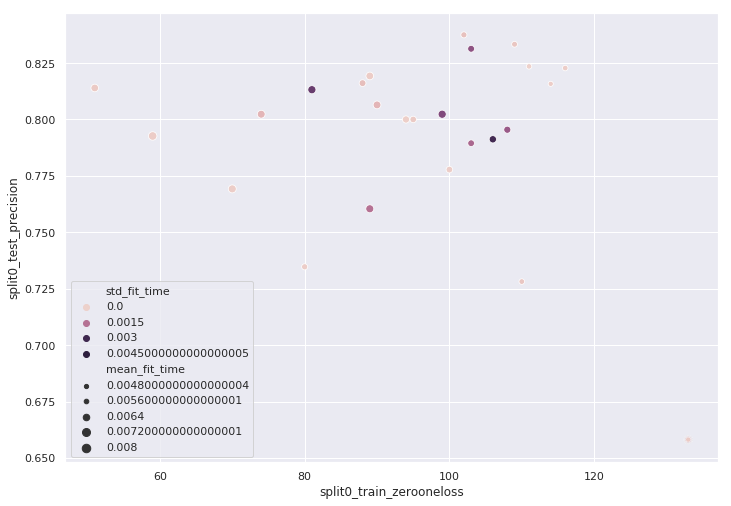

In [0]:
sns.scatterplot(df_model['split0_train_zerooneloss'], df_model['split0_test_precision'],size=df_model['mean_fit_time'],hue=df_model['std_fit_time'])

In [0]:
df = df_model.T

In [0]:
df['ex'] = df.index

In [0]:
splitdf = df['ex'].str.split("_", expand=True)
splitdf.columns = ['split_param','train_test_param','score','param_2']

In [0]:
df2 = pd.concat([df, splitdf],axis=1)

In [0]:
finaldf = df2[(df2['score'].isin(score)) & (df2['train_test_param']=="train") & df2['split_param'].str.contains("split") ]

In [0]:
finaldf.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,ex,split_param,train_test_param,score,param_2
split0_train_accuracy,0.786517,0.786517,0.786517,0.786517,0.786517,0.786517,0.834671,0.858748,0.829856,0.847512,0.817014,0.839486,0.869984,0.918138,0.836276,0.88122,0.82504,0.857143,0.786517,0.786517,0.786517,0.786517,0.786517,0.786517,0.834671,0.855538,0.823435,0.849117,0.82183,0.841091,0.871589,0.905297,0.826645,0.88764,0.813804,0.857143,split0_train_accuracy,split0,train,accuracy,None
split1_train_accuracy,0.789727,0.789727,0.789727,0.789727,0.789727,0.789727,0.836276,0.865169,0.834671,0.860353,0.831461,0.850722,0.88122,0.911717,0.852327,0.88443,0.826645,0.861958,0.789727,0.789727,0.789727,0.789727,0.789727,0.789727,0.839486,0.858748,0.837881,0.855538,0.829856,0.850722,0.892456,0.895666,0.847512,0.886035,0.829856,0.861958,split1_train_accuracy,split1,train,accuracy,None
split2_train_accuracy,0.788122,0.788122,0.788122,0.788122,0.788122,0.788122,0.852327,0.855538,0.834671,0.845907,0.829856,0.844302,0.871589,0.906902,0.853933,0.88122,0.82825,0.850722,0.794543,0.794543,0.794543,0.794543,0.794543,0.794543,0.850722,0.861958,0.855538,0.858748,0.823435,0.850722,0.88122,0.911717,0.852327,0.886035,0.849117,0.857143,split2_train_accuracy,split2,train,accuracy,None
split3_train_accuracy,0.794543,0.794543,0.794543,0.794543,0.794543,0.794543,0.837881,0.853933,0.833066,0.850722,0.836276,0.842697,0.863563,0.903692,0.841091,0.88122,0.839486,0.857143,0.794543,0.794543,0.794543,0.794543,0.794543,0.794543,0.844302,0.855538,0.834671,0.847512,0.836276,0.853933,0.87801,0.88764,0.842697,0.88443,0.836276,0.868379,split3_train_accuracy,split3,train,accuracy,None
split4_train_accuracy,0.800963,0.800963,0.800963,0.800963,0.800963,0.800963,0.844302,0.853933,0.837881,0.853933,0.82504,0.849117,0.895666,0.921348,0.844302,0.890851,0.826645,0.852327,0.800963,0.800963,0.800963,0.800963,0.800963,0.800963,0.850722,0.858748,0.836276,0.853933,0.826645,0.849117,0.886035,0.919743,0.863563,0.894061,0.823435,0.852327,split4_train_accuracy,split4,train,accuracy,None


In [0]:
finaldf.columns

Index([                 0,                  1,                  2,
                        3,                  4,                  5,
                        6,                  7,                  8,
                        9,                 10,                 11,
                       12,                 13,                 14,
                       15,                 16,                 17,
                       18,                 19,                 20,
                       21,                 22,                 23,
                       24,                 25,                 26,
                       27,                 28,                 29,
                       30,                 31,                 32,
                       33,                 34,                 35,
                     'ex',      'split_param', 'train_test_param',
                  'score',          'param_2'],
      dtype='object')

In [0]:
gapminder = px.data.gapminder()
gapminder

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4
5,Afghanistan,Asia,1977,38.438,14880372,786.113360,AFG,4
6,Afghanistan,Asia,1982,39.854,12881816,978.011439,AFG,4
7,Afghanistan,Asia,1987,40.822,13867957,852.395945,AFG,4
8,Afghanistan,Asia,1992,41.674,16317921,649.341395,AFG,4
9,Afghanistan,Asia,1997,41.763,22227415,635.341351,AFG,4


In [0]:
import plotly.express as px
finaldf.columns = finaldf.columns.astype(str)

fig = px.scatter(finaldf, x='1', y='2', animation_frame="split_param", animation_group="score",
            color="train_test_param"
           )
fig.show()

In [0]:
x = range(1,100)
y = 


In [0]:
df['ex'].str.split("_", expand=True)[]

mean_fit_time                      time
std_fit_time                       time
mean_score_time                    time
std_score_time                     time
param_criterion                    None
param_max_depth                   depth
param_min_samples_leaf          samples
param_splitter                     None
params                             None
split0_test_accuracy           accuracy
split1_test_accuracy           accuracy
split2_test_accuracy           accuracy
split3_test_accuracy           accuracy
split4_test_accuracy           accuracy
split5_test_accuracy           accuracy
split6_test_accuracy           accuracy
split7_test_accuracy           accuracy
split8_test_accuracy           accuracy
split9_test_accuracy           accuracy
mean_test_accuracy             accuracy
std_test_accuracy              accuracy
rank_test_accuracy             accuracy
split0_train_accuracy          accuracy
split1_train_accuracy          accuracy
split2_train_accuracy          accuracy


In [0]:
df2.groupby(['Invoice','CustomerID'],as_index=False)

In [0]:
sns.barplot

In [0]:
[key for key, value in ModelObjectGrid.basemodel_scores['DecisionTreeClassifier'].items() if 'precision' in key.lower()]

['split0_test_precision',
 'split1_test_precision',
 'split2_test_precision',
 'split3_test_precision',
 'split4_test_precision',
 'split5_test_precision',
 'split6_test_precision',
 'split7_test_precision',
 'split8_test_precision',
 'split9_test_precision',
 'mean_test_precision',
 'std_test_precision',
 'rank_test_precision',
 'split0_train_precision',
 'split1_train_precision',
 'split2_train_precision',
 'split3_train_precision',
 'split4_train_precision',
 'split5_train_precision',
 'split6_train_precision',
 'split7_train_precision',
 'split8_train_precision',
 'split9_train_precision',
 'mean_train_precision',
 'std_train_precision',
 'split0_test_average_precision',
 'split1_test_average_precision',
 'split2_test_average_precision',
 'split3_test_average_precision',
 'split4_test_average_precision',
 'split5_test_average_precision',
 'split6_test_average_precision',
 'split7_test_average_precision',
 'split8_test_average_precision',
 'split9_test_average_precision',
 'mean_tes

In [0]:
x = ModelObjectGrid.basemodel_scores['DecisionTreeClassifier']['split1_test_accuracy']

In [0]:
y = [str(each_dictparam) for each_dictparam in ModelObjectGrid.basemodel_scores['DecisionTreeClassifier']['params']]

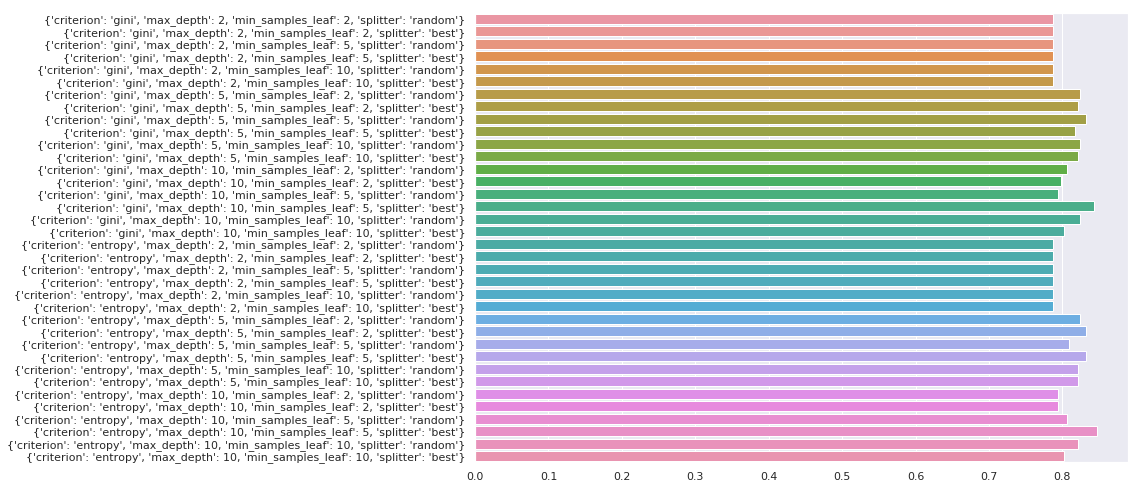

In [0]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x=x,y=y)

In [0]:
import plotly.express as px
gapminder = px.data.gapminder()
gridby = 
fig = px.scatter(gapminder, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country", facet_col="continent",
           log_x=True, size_max=45, range_x=[100,100000], range_y=[25,90])
fig.show()

In [0]:
ModelObjectGrid.best_param_output

{'DecisionTreeClassifier': {'criterion': 'entropy',
  'max_depth': 5,
  'min_samples_leaf': 2,
  'splitter': 'best'},
 'KNeighborsClassifier': {'algorithm': 'auto', 'n_neighbors': 20},
 'LogisticRegression': {'C': 1.0, 'penalty': 'l2'},
 'RandomForestClassifier': {'n_estimators': 16}}

In [0]:
ModelObjectGrid.best_estimator_output

{'DecisionTreeClassifier': DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                        max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=2, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=None, splitter='best'),
 'KNeighborsClassifier': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                      weights='uniform'),
 'LogisticRegression': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='warn', n_jobs=None, penalty='l2',
                    random_state=None, solver='warn', tol=0.0001, verbose=0,
                    warm_start=F

In [0]:
ModelObjectGrid.best_score_output

{'DecisionTreeClassifier': 0.8261194029850746,
 'KNeighborsClassifier': 0.7097014925373134,
 'LogisticRegression': 0.8074626865671641,
 'RandomForestClassifier': 0.8059701492537313}

In [0]:
ModelObjectGrid.base_model_output

{'DecisionTreeClassifier': {'Time': 0.006486103269788953,
  'test_accuracy_mean': 0.7958747927031511,
  'test_accuracy_std': 0.024635195028419262,
  'test_average_precision_mean': 0.655686709957318,
  'test_average_precision_std': 0.042334536130229,
  'test_balanced_accuracy_mean': 0.7695406217988017,
  'test_balanced_accuracy_std': 0.03302247591630523,
  'test_f1_score_mean': 0.7077464941284757,
  'test_f1_score_std': 0.05178501915772647,
  'test_hamming_loss_mean': 0.20412520729684908,
  'test_hamming_loss_std': 0.024635195028419262,
  'test_jaccard_score_mean': 0.5514694692362018,
  'test_jaccard_score_std': 0.06098200880501278,
  'test_log_loss_mean': 7.050287219937244,
  'test_log_loss_std': 0.8508720442736553,
  'test_precision_mean': 0.8059860669678668,
  'test_precision_std': 0.0596284176170674,
  'test_recall_mean': 0.646625583881634,
  'test_recall_std': 0.09742740591821371,
  'test_roc_auc_score_mean': 0.7695406217988017,
  'test_roc_auc_score_std': 0.03302247591630523,
  't

In [0]:
ModelObjectGrid.getModelDataframe(ModelObjectGrid.base_model_output,sort_column=['Difference_zero_one_loss_unit','test_precision_mean'],asscending=[True, True],difference_by='zero_one_loss',score_filter=['f1score','precision','recall','zerooneloss','hammingloss'],agg='mean')

,train_f1_score_mean,test_f1_score_mean,train_precision_mean,test_precision_mean,train_recall_mean,test_recall_mean,train_zero_one_loss_mean,test_zero_one_loss_mean,train_hamming_loss_mean,test_hamming_loss_mean,Time,Difference_zero_one_loss_unit
RandomForestClassifier,0.973506,0.745199,0.980334,0.761543,0.966868,0.731680,12.450000,52.250000,0.019984,0.194963,0.050717,3980.000000
DecisionTreeClassifier,0.754575,0.707746,0.862035,0.805986,0.681620,0.646626,102.786111,54.705556,0.164986,0.204125,0.006486,4808.055556
KNeighborsClassifier,0.634781,0.576191,0.742008,0.672379,0.560083,0.511000,149.818750,78.318750,0.240480,0.292234,0.007530,7150.000000
LogisticRegression,0.669442,0.669412,0.745986,0.739447,0.625856,0.630520,136.421429,61.357143,0.218975,0.228945,0.033352,7506.428571


In [0]:
ModelObjectGrid.base_model_output['GradientBoostingClassifier']

{'Time': 0.038275063037872314,
 'test_accuracy': 0.8138992537313432,
 'test_average_precision': 0.6764430639228018,
 'test_balanced_accuracy': 0.8007380709346205,
 'test_f1_score': 0.7561132523020784,
 'test_hamming_loss': 0.18610074626865672,
 'test_jaccard_score': 0.6089125276229047,
 'test_log_loss': 6.427758894323159,
 'test_precision': 0.7762764824245149,
 'test_recall': 0.7392519839557108,
 'test_roc_auc_score': 0.8007380709346205,
 'test_zero_one_loss': 49.875,
 'train_accuracy': 0.9430979133226325,
 'train_average_precision': 0.8914687331134105,
 'train_balanced_accuracy': 0.9345098024821729,
 'train_f1_score': 0.9228840712292266,
 'train_hamming_loss': 0.05690208667736757,
 'train_jaccard_score': 0.8579330518279487,
 'train_log_loss': 1.9653433363238753,
 'train_precision': 0.9483367347101325,
 'train_recall': 0.899128355722376,
 'train_roc_auc_score': 0.9345098024821729,
 'train_zero_one_loss': 35.449999999999996}

In [0]:
ModelObjectGrid.feature_importance

{'AdaBoostClassifier': array([0.08, 0.  , 0.02, 0.  , 0.02, 0.02, 0.  , 0.  , 0.02, 0.  , 0.02,
        0.  , 0.02, 0.02, 0.  , 0.32, 0.46]),
 'DecisionTreeClassifier': array([0.        , 0.01233995, 0.07555231, 0.00621523, 0.        ,
        0.01036319, 0.00506253, 0.0076673 , 0.31602944, 0.01099907,
        0.00248609, 0.00124305, 0.03671279, 0.00343317, 0.0084759 ,
        0.19702325, 0.30639673]),
 'ExtraTreesClassifier': array([0.02799373, 0.02698257, 0.05921482, 0.15000011, 0.05276845,
        0.01610358, 0.00975973, 0.00957136, 0.07921889, 0.03394234,
        0.01059035, 0.01877526, 0.00651609, 0.0045647 , 0.01002918,
        0.22652452, 0.25744431]),
 'GradientBoostingClassifier': array([1.97487648e-02, 2.93108213e-03, 1.13035795e-01, 2.23852547e-03,
        1.14761763e-02, 1.15853975e-02, 4.29506201e-03, 2.73712162e-03,
        4.61963752e-01, 3.59865243e-03, 8.90791856e-04, 1.43345253e-03,
        5.82819389e-02, 3.61793561e-04, 1.55998340e-03, 9.19333810e-02,
        2.1192

In [0]:
ModelObjectGrid.getFeatureImportanceDF(X, ModelObjectGrid.feature_importance, ModelObjectGrid.important_col)

,DecisionTreeClassifier,RandomForestClassifier,ExtraTreesClassifier,AdaBoostClassifier,GradientBoostingClassifier
Fare,0.367953,0.339507,0.346608,0.52,0.253156
Age,0.204889,0.273394,0.229283,0.32,0.102622
Title_1,0.317910,0.150570,0.225740,0.06,0.462375
Pclass_3,0.080474,0.074705,0.086958,0.04,0.122280
Sex_0,0.028773,0.161824,0.111411,0.06,0.059567


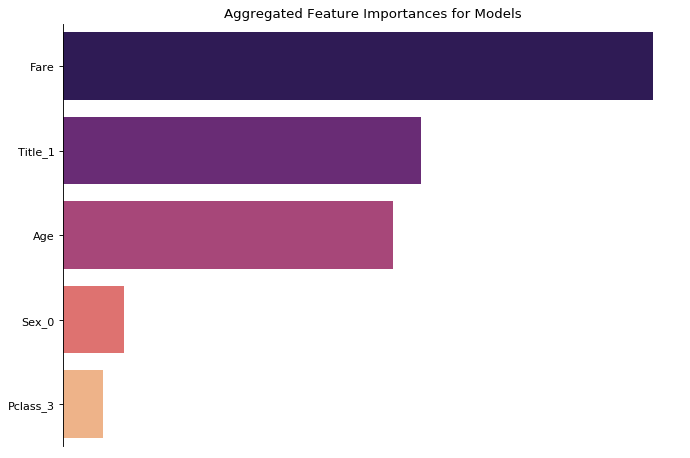

In [0]:
ModelObjectGrid.getFeatureImportanceGraph(ModelObjectGrid.getFeatureImportance(ModelObjectGrid.getFeatureImportanceDF(X, ModelObjectGrid.feature_importance, ModelObjectGrid.important_col)))

In [0]:
Modeldf = ModelObjectGrid.getModelDataframe(ModelObjectGrid.base_model_output,sort_column=['Difference_zero_one_loss_unit','test_precision'],asscending=[True, True],difference_by='zero_one_loss',score_filter=['f1_score','precision','recall','zero_one_loss','hamming_loss'])

In [0]:
# Modeldf = ModelObjectGrid.getModelDataframe(ModelObjectGrid.base_model_output,sort_column=['Difference_recall_unit','train_zero_one_loss'],asscending=[True, True],difference_by='recall',score_filter=['f1_score','precision','recall','zero_one_loss'])
ModelObjectGrid.getModelValidationGraph(Modeldf,x_col='test_f1_score', Difference_bins=5,difference_col ='Difference_zero_one_loss_unit',size='train_hamming_loss')

<Figure size 1296x576 with 0 Axes>

In [0]:
ModelObjectGrid.getModelValidationGraph(Modeldf,x_col='test_zero_one_loss', Difference_bins=5,difference_col ='Difference_recall_unit',size='Time')

<Figure size 1296x576 with 0 Axes>

# BaseLineModelling

In [0]:
# Initialize the Class
ModelObject = BaseModellingHelper(basic_params,base_model)

In [0]:
# Running the baseline Model - Selection of models with default parameters. 
# %time ModelObject.runBaseLineModel(X,y,score_type='test')
%time ModelObject.runBaseLineModel(X,y,score_type='test',top_feature=5)

Building model with only 5 important feature
CPU times: user 1min 26s, sys: 16.4 s, total: 1min 42s
Wall time: 1min 19s


In [0]:
ModelObject.base_model_output['BaggingClassifier']

{'Time': 0.017960548400878906,
 'test_accuracy': 0.8130597014925375,
 'test_average_precision': 0.6744640836185989,
 'test_balanced_accuracy': 0.7974357645894373,
 'test_f1_score': 0.7512072402708609,
 'test_hamming_loss': 0.1869402985074627,
 'test_jaccard_score': 0.6033887688239377,
 'test_log_loss': 6.456753316155874,
 'test_precision': 0.7800293748615766,
 'test_recall': 0.7270002990740538,
 'test_roc_auc_score': 0.7974357645894373,
 'test_zero_one_loss': 50.1,
 'train_accuracy': 0.9659711075441411,
 'train_average_precision': 0.9361946371554316,
 'train_balanced_accuracy': 0.9598069283968205,
 'train_f1_score': 0.9542647782199722,
 'train_hamming_loss': 0.034028892455858745,
 'train_jaccard_score': 0.9126042813972048,
 'train_log_loss': 1.1753234948920002,
 'train_precision': 0.9754299936339985,
 'train_recall': 0.9341300356720514,
 'train_roc_auc_score': 0.9598069283968202,
 'train_zero_one_loss': 21.2}

In [0]:
ModelObject.getModelDataframe(ModelObject.base_model_output,sort_column=['Difference_recall_unit','train_zero_one_loss'],asscending=[True, True],difference_by='recall',score_filter=['f1_score','precision','recall','zero_one_loss'])

,train_f1_score,test_f1_score,train_precision,test_precision,train_recall,test_recall,train_zero_one_loss,test_zero_one_loss,Time,Difference_recall_unit
SGDClassifier,0.606210,0.611879,0.591644,0.601787,0.704248,0.704919,210.3,91.9,0.004070,0.067023
PassiveAggressiveClassifier,0.546667,0.548610,0.539197,0.532440,0.640538,0.646996,212.7,95.8,0.003586,0.645769
LinearSVC,0.596274,0.593865,0.646412,0.645798,0.692650,0.701206,194.8,88.9,0.040076,0.855606
LogisticRegressionCV,0.725494,0.729658,0.740673,0.742712,0.712920,0.722265,127.4,55.9,0.191943,0.934452
Perceptron,0.385275,0.396158,0.462508,0.480827,0.502610,0.512206,258.1,114.4,0.003405,0.959639
QuadraticDiscriminantAnalysis,0.695788,0.686274,0.748300,0.719804,0.653869,0.663537,134.8,63.2,0.003023,0.966804
RidgeClassifierCV,0.729676,0.736371,0.731200,0.730897,0.728295,0.743133,127.7,55.7,0.006077,1.483845
LinearDiscriminantAnalysis,0.729440,0.735781,0.731115,0.729704,0.727910,0.743279,127.8,55.9,0.003850,1.536936
AdaBoostClassifier,0.777269,0.742446,0.792777,0.743630,0.762787,0.743365,103.4,54.0,0.065114,1.942141
BernoulliNB,0.724186,0.734553,0.723995,0.725590,0.724520,0.744496,130.6,56.4,0.003379,1.997546


In [0]:
ModelObject.feature_importance

{'AdaBoostClassifier': array([0.52, 0.32, 0.06, 0.04, 0.06]),
 'DecisionTreeClassifier': array([0.38170836, 0.19363548, 0.31790992, 0.07797348, 0.02877275]),
 'ExtraTreesClassifier': array([0.34417367, 0.22065095, 0.23067238, 0.09391721, 0.11058579]),
 'GradientBoostingClassifier': array([0.25305123, 0.10293305, 0.46219837, 0.122192  , 0.05962536]),
 'RandomForestClassifier': array([0.32768421, 0.25320772, 0.21788982, 0.08678449, 0.11443376])}

In [0]:
ModelObject.important_col 

['Fare', 'Age', 'Title_1', 'Pclass_3', 'Sex_0']

In [0]:
#With Top Feature
ModelObject.getFeatureImportanceDF(X, ModelObject.feature_importance, ModelObject.important_col)
#Without Top Feature
# ModelObject.getFeatureImportanceDF(X, ModelObject.feature_importance)

,AdaBoostClassifier,ExtraTreesClassifier,GradientBoostingClassifier,RandomForestClassifier,DecisionTreeClassifier
Fare,0.52,0.344174,0.253051,0.327684,0.381708
Age,0.32,0.220651,0.102933,0.253208,0.193635
Title_1,0.06,0.230672,0.462198,0.217890,0.317910
Pclass_3,0.04,0.093917,0.122192,0.086784,0.077973
Sex_0,0.06,0.110586,0.059625,0.114434,0.028773


In [0]:
# With Important Feature
ModelObject.getFeatureImportance(ModelObject.getFeatureImportanceDF(X, ModelObject.feature_importance, ModelObject.important_col))
# Without Important Feature
# ModelObject.getFeatureImportance(ModelObject.getFeatureImportanceDF(X, ModelObject.feature_importance))

,AdaBoostClassifier,ExtraTreesClassifier,GradientBoostingClassifier,RandomForestClassifier,DecisionTreeClassifier,SumofImp
Fare,1.000000,1.000000,0.480474,1.000000,1.000000,4.480474
Title_1,0.041667,0.546460,1.000000,0.544232,0.819235,2.951594
Age,0.583333,0.506415,0.107577,0.690840,0.467118,2.355285
Pclass_3,0.000000,0.000000,0.155417,0.000000,0.139404,0.294821
Sex_0,0.041667,0.066606,0.000000,0.114775,0.000000,0.223048


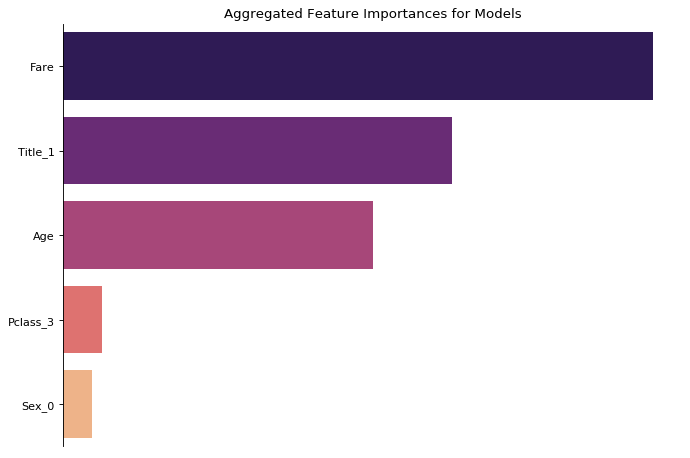

In [0]:
# With Important Feature 
ModelObject.getFeatureImportanceGraph(ModelObject.getFeatureImportance(ModelObject.getFeatureImportanceDF(X, ModelObject.feature_importance, ModelObject.important_col)))

#Wihout Important Feature
# ModelObject.getFeatureImportanceGraph(ModelObject.getFeatureImportance(ModelObject.getFeatureImportanceDF(X, ModelObject.feature_importance)))


In [0]:
Modeldf = ModelObject.getModelDataframe(ModelObject.base_model_output,sort_column=['Difference_recall_unit','train_zero_one_loss'],asscending=[True, True],difference_by='recall',score_filter=['f1_score','precision','recall','zero_one_loss'])
ModelObject.getModelValidationGraph(Modeldf,x_col='train_recall', Difference_bins=5,difference_col ='Difference_recall_unit',size='Time')

<Figure size 1296x576 with 0 Axes>

In [0]:
ModelObject.getModelValidationGraph(Modeldf,x_col='test_zero_one_loss', Difference_bins=5,difference_col ='Difference_recall_unit',size='Time')

<Figure size 1296x576 with 0 Axes>